# E-News Express Project - Student = Yoel Lapin

You are expected to perform the statistical analysis to answer the following questions:

-Explore the dataset and extract insights using Exploratory Data Analysis.    
-Do the users spend more time on the new landing page than the old landing page?     
-Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?     
-Does the converted status depend on the preferred language?       
-Is the mean time spent on the new page the same for the different language users?




### Based on the above we must test several hypotheses:

##### The user spends more time on the new landing page vs. old the old one
𝜇 mean time spent on the landing page  
𝐻0:𝜇 control group =𝜇 treatment group, the null hypothesis    
𝐻𝑎:𝜇 control group < 𝜇 treatment group, the alternative hypothesis    

##### The conversion rate on the new page is higher than on the old page
𝜇 new subscribers   
𝐻0:𝜇 control group =𝜇 treatment group, the null hypothesis     
𝐻𝑎:𝜇 control group < 𝜇 treatment group, the alternative hypothesis  

##### Conversion rate depends on the language
𝜇1 new subscribers in English, 𝜇2 new subscribers in French, 𝜇3 new subscribers in Spanish         
𝐻0:𝜇1=𝜇2=𝜇3, the null hypothesis         
𝐻𝑎:𝜇 , new subscribers per language are different, alternative hypothesis

##### Time spent on the new page is equal across different languages
𝜇1 mean time spent in the landing page in English, 𝜇2 mean time spent in the landing page in French, 𝜇3 mean time spent in the landing page in Spanish     
𝐻0:𝜇1=𝜇2=𝜇3, the null hypothesis       
𝐻𝑎:𝜇 At least one language is showing different results, the alternative hypothesis




### Import Python libraries and acquire the data set 

Set the environment for the Exploratory Data Analysis

In [1]:
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats #  library containing a large number of probability and statistical functions

In [2]:
# Data acquisition 
abtest = pd.read_csv ('abtest.csv')

### Basic EDA (Exploratory Data Analysis)

Perform the first tasks to explore and understand the dataset characteristics 

In [3]:
# Checking the different data type across the dataset
abtest.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [4]:
# Double check the above about not having null values
abtest.isnull()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
95,False,False,False,False,False,False
96,False,False,False,False,False,False
97,False,False,False,False,False,False
98,False,False,False,False,False,False


In [5]:
# Find the dataset number of records and attributes
abtest.shape

(100, 6)

In [6]:
# Become familiar with the dataset values and meaning by reviewing the first few records
abtest.head ()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


Summarizing the attributes' basic statistical data with describe() w/o splitting the data frame won't provide insights as we have a "Group A" and "Group B" to deal with.
The Group and Landing page attributes are redundant, they both describe Group A and B.


### Univariable analysis

Explore the data and distribution across single variables; preferred language converted and groups.


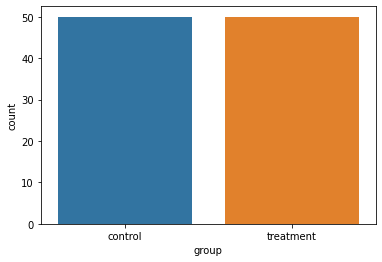

In [7]:
# Group A and B distribution count
sns.countplot (data = abtest, x='group'  );
plt.show ()

Group sizes are exacly the same, the sample. 

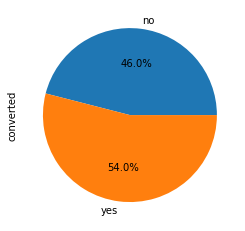

In [8]:
# Converted vs. non coverted
nbr_of_converted = abtest.groupby("converted")["converted"].count()
nbr_of_converted
nbr_of_converted.plot.pie(autopct="%.1f%%");

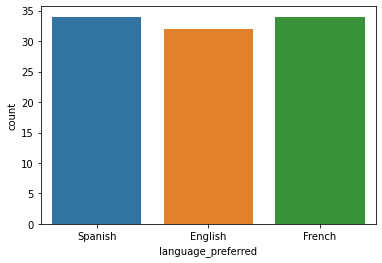

In [9]:
# Preferred language distribution count
sns.countplot (data = abtest, x='language_preferred'  );
plt.show ()

We don't know if the last univariable analysis refers to Group A or B but they look equally distributed. 

(array([ 6.,  6.,  8., 12., 19., 16., 17.,  8.,  5.,  3.]),
 array([ 0.19 ,  1.242,  2.294,  3.346,  4.398,  5.45 ,  6.502,  7.554,
         8.606,  9.658, 10.71 ]),
 <a list of 10 Patch objects>)

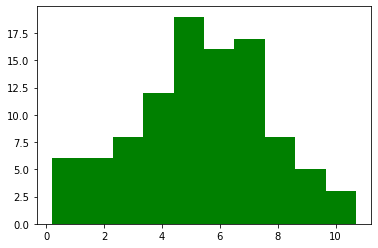

In [10]:
# Checking the spent time distribution
plt.hist(abtest.time_spent_on_the_page, color='g')

C:\Users\ylapin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


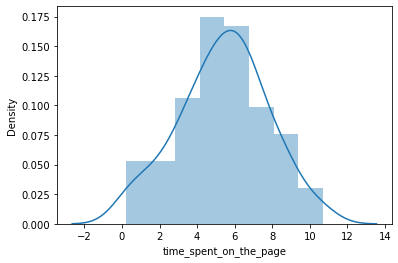

In [11]:
# Checking if the time spent on the page is normally distributed
sns.distplot (abtest.time_spent_on_the_page)

It looks like the above time spent on the page is normally distributed. 
To clarify further let proceed with a Bivariate and Multivariate Analysis.

### Bivariate and Multivariate Analysis

We are going to go dig into the patterns and relations to start to infer conclusions.


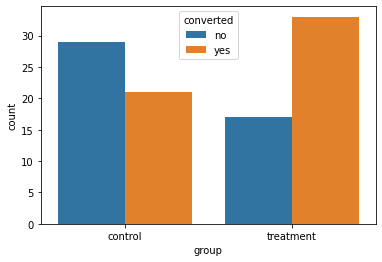

In [12]:
# Checking the Groups and Conversion relationship
sns.countplot (data = abtest, x='group' , hue = 'converted');
plt.show ()


It looks like the new landing page converts more users into subscribers. Is statistically different? 

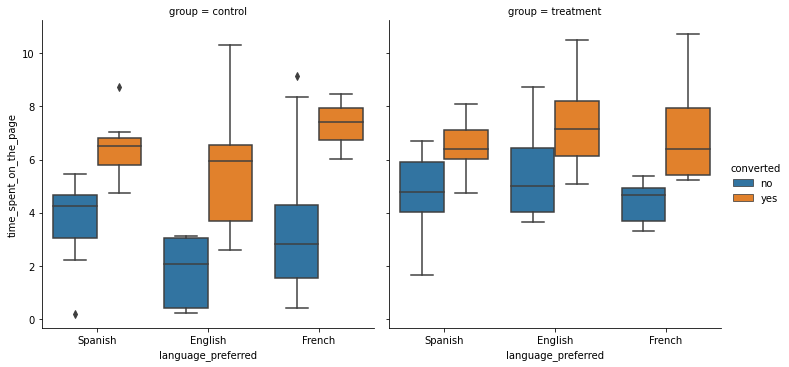

In [13]:
sns.catplot(x="language_preferred",
               y = "time_spent_on_the_page",
               hue="converted", 
               col="group", 
               data=abtest, 
               kind="box");

The first impression of the above results it looks the new landing page makes the users stay longer.  This may drive a higher conversion rate of subscribers. This observation is pretty consistent across languages.

### Statistical Analysis and hypothesis testing

We are going to perform some test to validate the hypothesis are correct. 
Data manipulation is required to prepare for the testing.

In [14]:
# Let split the data frame by grouping by Group A and B

bygroup = abtest.groupby(abtest.group)
treatment = bygroup.get_group("treatment")
print (treatment)

control = bygroup.get_group("control")
print (control)

# The print used to visually validate the data frame, quick sample check.

    user_id      group landing_page  time_spent_on_the_page converted  \
1    546468  treatment          new                    7.13       yes   
2    546462  treatment          new                    4.40        no   
4    546459  treatment          new                    4.75       yes   
6    546448  treatment          new                    5.25       yes   
8    546461  treatment          new                   10.71       yes   
12   546491  treatment          new                    5.86       yes   
13   546478  treatment          new                    6.03       yes   
15   546466  treatment          new                    6.27       yes   
16   546443  treatment          new                    8.73        no   
22   546450  treatment          new                    3.65        no   
23   546475  treatment          new                    7.02       yes   
24   546456  treatment          new                    6.18        no   
25   546455  treatment          new                

### Hypothesis 1: the user spends more time on the new landing page     
𝜇 mean time spent on the landing page     
𝐻0:𝜇 control group =𝜇 treatment group, the null hypothesis     
𝐻𝑎:𝜇 control group < 𝜇 treatment group, the alternative hypothesis

 

In [15]:
# Let calculate the statistical data of the two groups, A and B

print ("The Control Group mean is " , np.mean (control.time_spent_on_the_page))
print ("The Treatment Group mean is " , np.mean (treatment.time_spent_on_the_page))
print ("The Control Group std is " , np.std (control.time_spent_on_the_page))
print ("The Treatment Group std is ", np.std (treatment.time_spent_on_the_page))

The Control Group mean is  4.532400000000001
The Treatment Group mean is  6.2232
The Control Group std is  2.556024694716387
The Treatment Group std is  1.7987689568146321


In [16]:
# Time spent on landing page means difference, treatment vs. control group

diff = np.mean (treatment.time_spent_on_the_page) - np.mean (control.time_spent_on_the_page)
print ("Users spent", round (diff, 2) ,"minutes more on the new landing page." )

Users spent 1.69 minutes more on the new landing page.


Let proceed with the statistical test.

#### Paired T-test assumptions are satisfied:

Continuous data - Yes    
Normally distributed populations - Yes, the populations are assumed to be normal     
Independent observations - As we are taking the sampled unit randomly, the observed units are independent       
Random sampling from the population - Yes, simple random sample

In [17]:
# import the required functions
from scipy.stats import ttest_rel

# find the p-value
test_stat, p_value = ttest_rel(control['time_spent_on_the_page'], treatment['time_spent_on_the_page'], alternative = 'less') # answer greater
print('The p-value is ', p_value)

The p-value is  0.00029910900937037973


###### Insight 
We reject the null hypothesis; we can find significant evidence to confirm the users spent more time on the new page.


### Hypothesis 2: the conversion rate on the new page is higher than on the old page
𝜇 counts new subscribers     
𝐻0:𝜇 control group =𝜇 treatment group, the null hypothesis   
𝐻𝑎:𝜇 control group < 𝜇 treatment group, the alternative hypothesis   


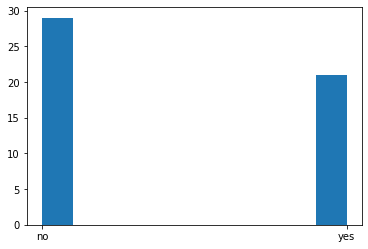

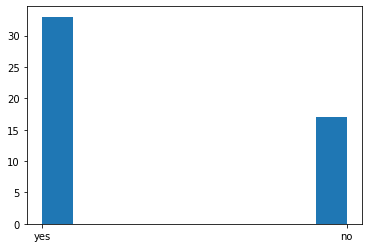

In [18]:
# Checking the converted rate per group, A and B   
plt.hist(control["converted"])
plt.show()      
plt.hist(treatment["converted"])
plt.show()

Conclusion per plots:
    The Control Group converted accounts for 21 out of the 50 users in the sample.
    The Treatment Groups account for 33 out of the 50 users in the sample.


In [19]:
# Control Group % of converted   
perc_control = 21/50
print ("The Control Group conversion rate is ", (perc_control))

# Treatment Group % of converted   
perc_treatment = 33/50
print ("The Treatment Group conversion rate is", (perc_treatment))

The Control Group conversion rate is  0.42
The Treatment Group conversion rate is 0.66


#### Let's test whether the Z-test assumptions are satisfied :

Binomially distributed population - Yes     
Random sampling from the population - Yes, a random sample        
Can the binomial distribution approximated to a normal distribution - Yes


In [20]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted suscribers
defect_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(defect_count, nobs) # alternative = less
print('The p-value is ' , (p_value))

The p-value is  0.016052616408112556


###### Insight 
As the p-value is less than the significance level of 0.05, we can reject the null hypothesis. Thus, we conclude the new landing page is bringing more subscribers.

### Hypothesis 3: conversion rate depends on the language
𝜇1 new subscribers in English, 𝜇2 new subscribers in French, 𝜇3 new subscribers in Spanish      
𝐻0:𝜇1=𝜇2=𝜇3, null hypothesis             
𝐻𝑎:𝜇 , new subscribers per language are different, alternative hypothesis



In [21]:
#Create contingency table using the original data frame for the creation

cont_table = pd.crosstab(index=abtest['language_preferred'], columns=abtest['converted'])
cont_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


#### Chi-Square Test for Independence

Let's test whether the assumptions are satisfied:

Categorical variables - Yes
The expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5
Random sampling from the population - Yes, a random sample


In [22]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value

chi2, p, dof, expected = stats.chi2_contingency(cont_table)
print('The p-value is ' , (p))

The p-value is  0.2129888748754345


###### Insight 
As the p-value is more than the significance level of 0.05, we can't reject the null hypothesis.
We can't conclude the language plays a role.


### Hypothesis 4: Time spent on the new page is equal across different languages
𝜇1 mean time spent in the landing page in English, 𝜇2 mean time spent in the landing page in French, 𝜇3 mean time spent in the landing page in Spanish     
𝐻0:𝜇1=𝜇2=𝜇3, the null hypothesis      
𝐻𝑎:𝜇 At least one language is showing different results, the alternative hypothesis     



In [23]:
# get the levels of factor per language
abtest['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

The prefered language number of users looks to be similar. But before checking the below with the One Way Anova test we need to validate other conditions first.

##### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent in the page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent in the page does not follow a normal distribution

In [24]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(abtest['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


Since the p-value of the test is higher than 0.05,  we fail to reject the null hypothesis that the response follows the normal distribution.

##### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [25]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(       abtest['time_spent_on_the_page'][abtest['language_preferred']=="Spanish"], 
                                   abtest['time_spent_on_the_page'][abtest['language_preferred']=="English"], 
                                   abtest['time_spent_on_the_page'][abtest['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


Since the p-value is higher than 0.05, we fail to reject the null hypothesis of homogeneity of variances.

###  One-way ANOVA Test

Let's test whether the assumptions are satisfied:

The populations are normally distributed - Yes, the normality assumption is verified using Shapiro-Wilk’s test
Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample
Population variances are equal - Yes, the homogeneity of variance assumption is verified using Levene's test


In [26]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(abtest.loc[abtest['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              abtest.loc[abtest['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              abtest.loc[abtest['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' , (p_value))

The p-value is  0.8665610536012648


###### Insight 
Based on the p-value higher than 0.05 we can't reject the null hypothesis. The time spent on the landing page is statistically the same across languages. 

Let go further and check if the difference in at least one language. 

### Multiple Comparison test (Tukey HSD)


In order to identify for which Time spent on the new page is different from other languages, the null hypothesis is

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

In [27]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = abtest['time_spent_on_the_page'], groups = abtest['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.3058 0.8482 -1.7123 1.1006  False
English Spanish  -0.2273    0.9 -1.6338 1.1792  False
 French Spanish   0.0785    0.9 -1.3065 1.4635  False
-----------------------------------------------------


###### Insight 
The table above concludes for each option we fail to reject the null hypotheses. The time users spent on the landing page across the different languages is statistically the same. 